
Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


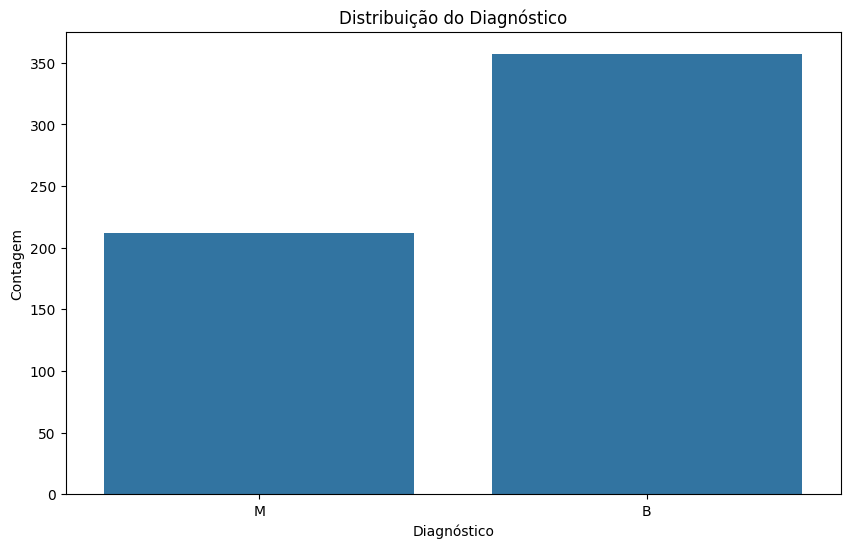

In [120]:
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

# Para pruning
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Para quantização
import joblib
import time
import sys


RANDOM_STATE = 2  # ou qualquer outro número

# Carregar o dataset
dataset = pd.read_csv("./breast+cancer+wisconsin+diagnostic.csv", sep=",")
# dataset = datasets.load_iris(as_frame=True).frame

# Informações gerais
print("\nInformações gerais do dataset:")
dataset.info()

# Contabiliza numero de amostras por classe
print("\nContabilização de amostras por classe:")
print(dataset['diagnosis'].value_counts())

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
display(dataset.describe())
# Análise da distribuição da variável alvo (diagnosis)
plt.figure(figsize=(10, 6))
sns.countplot(x='diagnosis', data=dataset)
plt.title('Distribuição do Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')
plt.savefig('/output/quality_distribution.png')
plt.show()

- Adicionar esse gráfico de correlação.
- Mencionar que o alcool é diretamente relacionado à qualidade e inversamente relacionado à densidade. Oq faz sentido já que alcool é menos denso que água.


In [121]:
from sklearn.preprocessing import StandardScaler 

# Remove columns with all NaN values
X = dataset.drop(['diagnosis'], axis=1)
X = X.dropna(axis=1, how='all')

# Optionally, drop rows with any NaN values (or use fillna if you prefer)
X = X.dropna(axis=0, how='any')

# Align y with the cleaned X
y = dataset.loc[X.index, 'diagnosis']

# Normalização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# X_scaled = X



In [122]:
# from scipy import stats

# # Remove outliers apenas das features mais problemáticas
# def remove_outliers(df, columns=None, threshold=3):
#     df_clean = df.copy()
#     if columns is None:
#         columns = [col for col in df.columns if col != 'diagnosis']  # Mantém 'diagnosis'
    
#     # Para cada feature especificada, localiza os outliers
#     indices_to_keep = np.ones(len(df), dtype=bool)
    
#     for col in columns:
#         z_scores = np.abs(stats.zscore(df_clean[col]))
#         column_mask = z_scores < threshold
#         indices_to_keep = indices_to_keep & column_mask
    
#     # Remove todas as linhas com outliers
#     df_clean = df_clean[indices_to_keep]
    
#     print(f"Removidos {len(df) - len(df_clean)} registros ({(len(df) - len(df_clean))/len(df)*100:.2f}%)")
#     return df_clean

# # Removendo outliers apenas das colunas com maior porcentagem
# problema_cols = ['perimeter_mean', 'texture_mean', 'radius_mean']
# dataset_clean = remove_outliers(dataset, columns=problema_cols)

# # Agora separe X e y do conjunto limpo
# X_scaled = dataset_clean.drop('diagnosis', axis=1)
# y = dataset_clean['diagnosis']

In [123]:
# Divide os conjuntos

# Divisão em treino+validação e teste
X_temp, X_test, y_temp, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

# Divisão do conjunto temp em treino e validação
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=RANDOM_STATE, stratify=y_temp)  # 0.25*0.8=0.2

print(f"Tamanho do conjunto de treino: {X_train.shape[0]}")
print(f"Tamanho do conjunto de validação: {X_val.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

Tamanho do conjunto de treino: 341
Tamanho do conjunto de validação: 114
Tamanho do conjunto de teste: 114


In [124]:
# Aplica SMOTE para balancear as classes (VALIDAR EFETIVIDADE)

# from imblearn.combine import SMOTETomek
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # # Primeiro, criamos o objeto SMOTE com os parâmetros desejados
# # smote = SMOTE(k_neighbors=3, random_state=RANDOM_STATE)

# # Depois, criamos o SMOTETomek usando o SMOTE configurado
# smt = SMOTETomek(sampling_strategy='auto',  random_state=RANDOM_STATE)

# # Aplicando SMOTE aos dados
# X_train, y_train = smt.fit_resample(X_train, y_train)


# # Verificando a nova distribuição
# print("Nova distribuição das classes:", Counter(y_train))

In [125]:
# # Matriz de correlação
# plt.figure(figsize=(12, 10))
# corr_matrix = dataset.corr()
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Matriz de Correlação entre Atributos')
# plt.show()

# # Correlação com a variável alvo (qualidade)
# target_corr = corr_matrix['target'].reindex(
#   corr_matrix['target'].abs().sort_values(ascending=False).index
# )
# print("Correlação com a qualidade do vinho:")
# display(target_corr)


In [126]:
## Treina o modelo de referência (baseline)

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

start_time = time.time()
rf_baseline_model = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
)
rf_baseline_model.fit(X_train, y_train)
rf_training_time = time.time() - start_time

# Avaliar no conjunto de validação
y_val_pred_rf = rf_baseline_model.predict(X_val)
rf_val_accuracy = accuracy_score(y_val, y_val_pred_rf)
rf_val_f1 = f1_score(y_val, y_val_pred_rf, average='weighted')


print(f"Random Forest Model:")
print(f"Tempo de treinamento: {rf_training_time:.4f} segundos")
print(f"Acurácia no conjunto de validação: {rf_val_accuracy:.4f}")
print(f"Profundidade da árvore: {rf_baseline_model.get_depth()}")

Random Forest Model:
Tempo de treinamento: 0.0077 segundos
Acurácia no conjunto de validação: 0.9211
Profundidade da árvore: 7


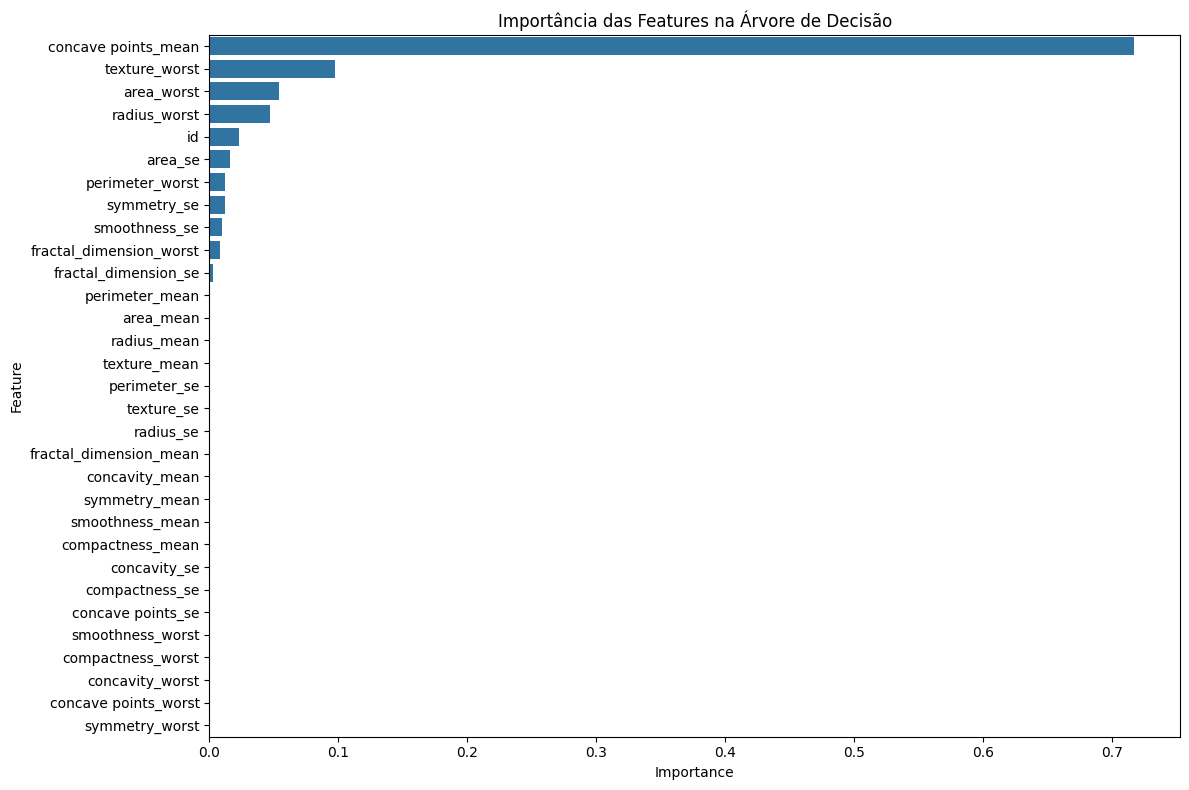

In [127]:
# Visualizar importância de features
plt.figure(figsize=(12, 8))
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_baseline_model.feature_importances_
}).sort_values('Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Importância das Features na Árvore de Decisão')
plt.tight_layout()
plt.show()


In [128]:
# Otimização do modelo com pruning de tamanho e profundidade

from sklearn.model_selection import StratifiedKFold
stratified_cv = StratifiedKFold(
    n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Definir parâmetros para pruning
param_grid = {
    'max_depth': [5, 10, 15, 20, 25,28],
}

# Aplicar GridSearchCV para encontrar melhores parâmetros
dt_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=RANDOM_STATE,class_weight='balanced'),
    param_grid=param_grid,
    cv=stratified_cv,
    scoring=['accuracy', 'balanced_accuracy', 'f1_weighted'],
    refit='accuracy',  # usa a taxa de acerto como métrica para o melhor modelo,
    n_jobs=-1  # Usar todos os cores disponíveis
)

dt_grid_search.fit(X_train, y_train)

# Encontrar o melhor modelo
best_pruned_model = dt_grid_search.best_estimator_

# Resultados
print(f"Melhores parâmetros: {dt_grid_search.best_params_}")
print(f"Profundidade: {best_pruned_model.max_depth:.2f}")

# Comparar com o baseline
pruned_val_acc = accuracy_score(y_val, best_pruned_model.predict(X_val))
print(f"Acurácia no conjunto de validação: {pruned_val_acc:.4f}")



Melhores parâmetros: {'max_depth': 10}
Profundidade: 10.00
Acurácia no conjunto de validação: 0.9386


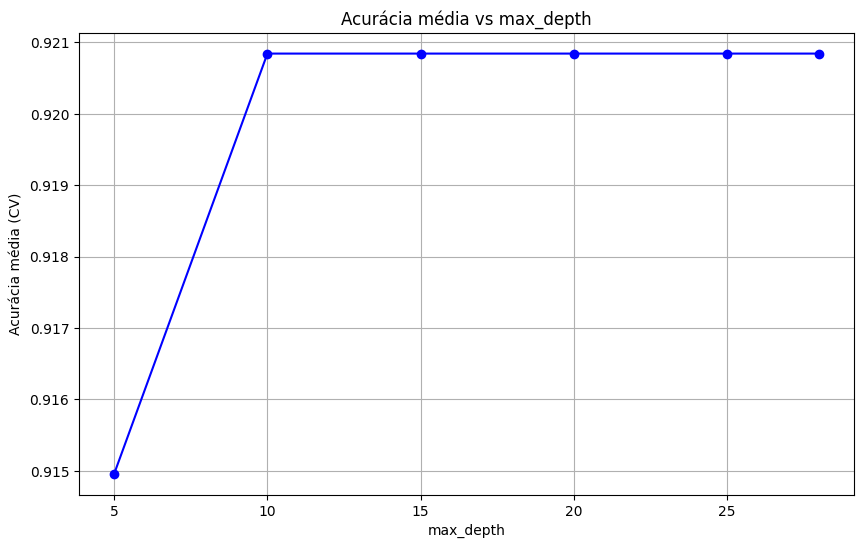

In [129]:
# Gráfico da taxa de acerto em função da profundidade máxima
results = pd.DataFrame(dt_grid_search.cv_results_)
plt.figure(figsize=(10, 6))

depth_values = []
accuracy_values = []

for depth in sorted([d for d in results['param_max_depth'].unique() if d is not None]):
    mask = results['param_max_depth'] == depth
    depth_values.append(depth)
    accuracy_values.append(results.loc[mask, 'mean_test_accuracy'].values[0])

plt.plot(depth_values, accuracy_values, 'b-o')
plt.xlabel('max_depth')
plt.ylabel('Acurácia média (CV)')
plt.title('Acurácia média vs max_depth')
plt.grid(True)
plt.show()

Features: 1, Train Acc: 0.9765, Val Acc: 0.8246
Features: 2, Train Acc: 0.9971, Val Acc: 0.8772
Features: 3, Train Acc: 1.0000, Val Acc: 0.9386
Features: 4, Train Acc: 1.0000, Val Acc: 0.9211
Features: 5, Train Acc: 1.0000, Val Acc: 0.9211
Features: 6, Train Acc: 1.0000, Val Acc: 0.9298
Features: 7, Train Acc: 1.0000, Val Acc: 0.9298
Features: 8, Train Acc: 1.0000, Val Acc: 0.9386
Features: 9, Train Acc: 1.0000, Val Acc: 0.9298
Features: 10, Train Acc: 1.0000, Val Acc: 0.9298
Features: 11, Train Acc: 1.0000, Val Acc: 0.9298
Features: 12, Train Acc: 1.0000, Val Acc: 0.9386
Features: 13, Train Acc: 1.0000, Val Acc: 0.9386
Features: 14, Train Acc: 1.0000, Val Acc: 0.9298
Features: 15, Train Acc: 1.0000, Val Acc: 0.9211
Features: 16, Train Acc: 1.0000, Val Acc: 0.9298
Features: 17, Train Acc: 1.0000, Val Acc: 0.9211
Features: 18, Train Acc: 1.0000, Val Acc: 0.9298
Features: 19, Train Acc: 1.0000, Val Acc: 0.9298
Features: 20, Train Acc: 1.0000, Val Acc: 0.9386
Features: 21, Train Acc: 1.00

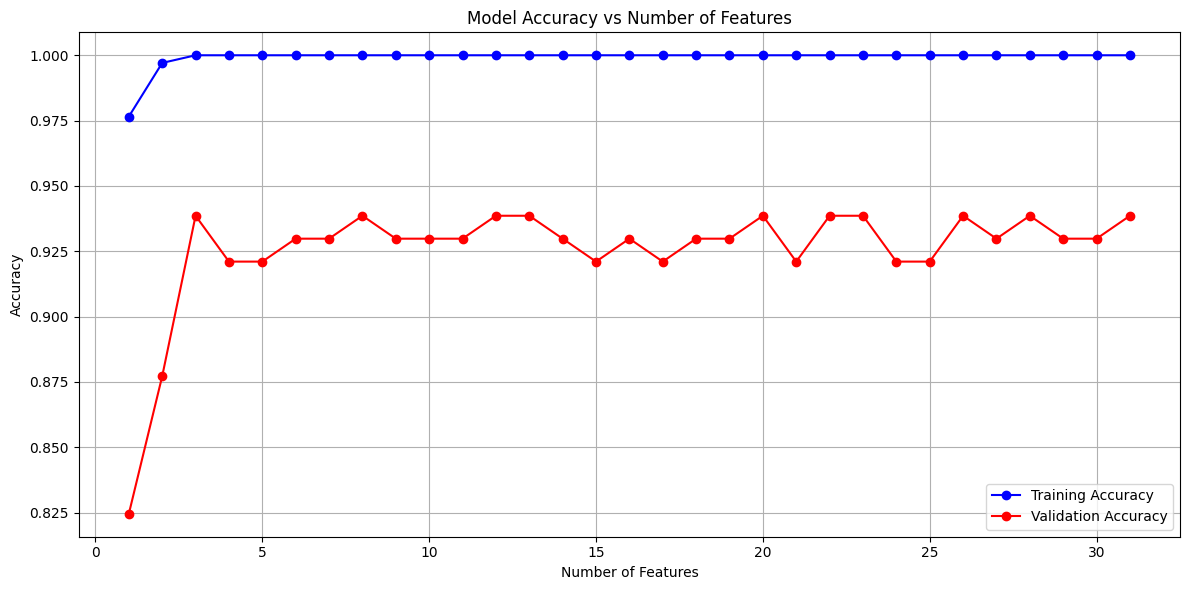


Optimal number of features: 3
Features used: concave points_mean, concavity_worst, radius_worst
Validation Accuracy: 0.9386


,Number of Features,Training Accuracy,Validation Accuracy,Features Used
0,1,0.976540,0.824561,concave points_mean
1,2,0.997067,0.877193,"concave points_mean, concavity_worst"
2,3,1.000000,0.938596,"concave points_mean, concavity_worst, radius_w..."
3,4,1.000000,0.921053,"concave points_mean, concavity_worst, radius_w..."
4,5,1.000000,0.921053,"concave points_mean, concavity_worst, radius_w..."
5,6,1.000000,0.929825,"concave points_mean, concavity_worst, radius_w..."
6,7,1.000000,0.929825,"concave points_mean, concavity_worst, radius_w..."
7,8,1.000000,0.938596,"concave points_mean, concavity_worst, radius_w..."
8,9,1.000000,0.929825,"concave points_mean, concavity_worst, radius_w..."
9,10,1.000000,0.929825,"concave points_mean, concavity_worst, radius_w..."


In [130]:
# Gera gráfico relacionando o número de features com a taxa de acerto

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_pruned_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Get ordered features from most to least important
ordered_features = feature_importance['Feature'].values

# Create lists to store results
num_features_list = []
val_accuracy_list = []
train_accuracy_list = []
feature_sets = []

# Get the best hyperparameters
max_depth = best_pruned_model.max_depth

# Iterate through different numbers of features
for i in range(1, len(ordered_features) + 1):
    # Take i most important features
    selected_features = ordered_features[:i]
    feature_sets.append(', '.join(selected_features))
    
    # Get indices of selected features
    selected_indices = [list(X.columns).index(feat) for feat in selected_features]
    
    # Select only these features from the datasets
    X_train_selected = X_train[:, selected_indices]
    X_val_selected = X_val[:, selected_indices]
    
    # Train a new model with the same hyperparameters as the best model
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        random_state=RANDOM_STATE,
        class_weight='balanced'
    )
    model.fit(X_train_selected, y_train)
    
    # Evaluate the model
    train_accuracy = accuracy_score(y_train, model.predict(X_train_selected))
    val_accuracy = accuracy_score(y_val, model.predict(X_val_selected))
    
    # Store results
    num_features_list.append(i)
    train_accuracy_list.append(train_accuracy)
    val_accuracy_list.append(val_accuracy)
    
    print(f"Features: {i}, Train Acc: {train_accuracy:.4f}, Val Acc: {val_accuracy:.4f}")

# Create a DataFrame for the results
results_df = pd.DataFrame({
    'Number of Features': num_features_list,
    'Training Accuracy': train_accuracy_list,
    'Validation Accuracy': val_accuracy_list,
    'Features Used': feature_sets
})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(num_features_list, train_accuracy_list, 'b-o', label='Training Accuracy')
plt.plot(num_features_list, val_accuracy_list, 'r-o', label='Validation Accuracy')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Model Accuracy vs Number of Features')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Find the optimal number of features (highest validation accuracy)
optimal_idx = val_accuracy_list.index(max(val_accuracy_list))
optimal_features = num_features_list[optimal_idx]
print(f"\nOptimal number of features: {optimal_features}")
print(f"Features used: {feature_sets[optimal_idx]}")
print(f"Validation Accuracy: {val_accuracy_list[optimal_idx]:.4f}")

# Show detailed results table
display(results_df)

# Define o número de features ótimas como 3 pois houve pouca queda na taxa de acerto
optimal_features = 30



Usando as 30 features mais importantes: concave points_mean, concavity_worst, radius_worst, area_worst, perimeter_worst, area_se, texture_worst, id, fractal_dimension_se, symmetry_worst, compactness_mean, perimeter_mean, area_mean, radius_mean, texture_mean, perimeter_se, texture_se, radius_se, fractal_dimension_mean, concavity_mean, symmetry_mean, smoothness_mean, smoothness_se, symmetry_se, compactness_se, concavity_se, concave points_se, compactness_worst, smoothness_worst, concave points_worst
Acurácia do modelo quantizado no conjunto de validação: 0.9298
Bits: 1, Acurácia: 0.8509
Bits: 2, Acurácia: 0.8509
Bits: 4, Acurácia: 0.8509
Bits: 8, Acurácia: 0.8509
Bits: 16, Acurácia: 0.8509
Bits: 32, Acurácia: 0.8509


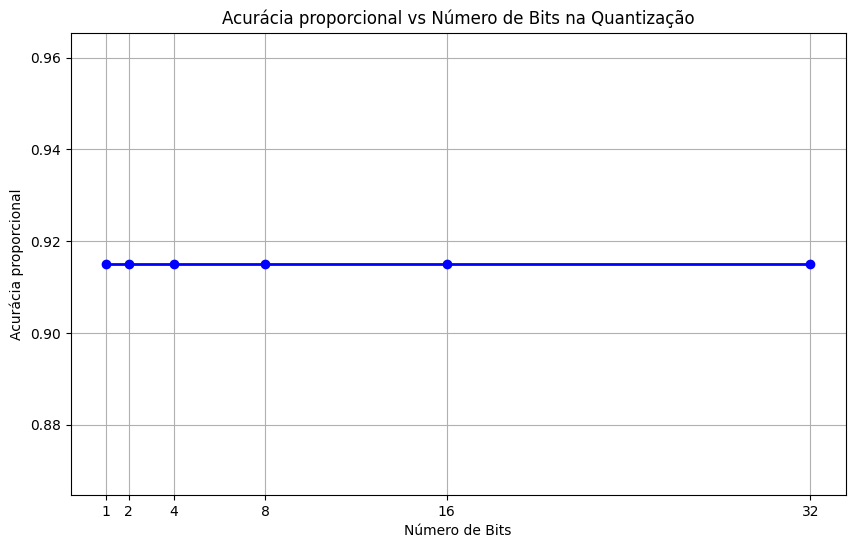


Melhor número de bits: 1
Melhor acurácia: 0.9151


In [131]:
## Quantização do modelo

class my_quantized_DT():
    """
    Navigation through quantized Decision Tree
    Tiago Oliveira Weber 2023 (parte inicial)
    """

    def __init__(self, clf, bits):
        # clf is a sklearn tree classifier
        levels = 2**bits
        max_value = levels-1
        min_value = 0

        # # TESTE
        # self = clf

        # quantizando parâmetros da árvore
        self.threshold = clf.tree_.threshold*max_value
        self.threshold = np.floor(self.threshold)
        self.threshold = self.threshold.astype(
            'int')         # value of comparison
        # sets to zero if threshold is negative
        self.threshold = np.maximum(self.threshold, 0)

        # extraindo os valores da dt do sklearn
        self.children_left = clf.tree_.children_left     # next node if left
        self.children_right = clf.tree_.children_right   # next node if right
        self.feature = clf.tree_.feature    # feature to be compared with
        self.value = clf.tree_.value    # number of members for each class

        # TESTE
        self.tree_ = clf.tree_  # tree structure
        self.n_features_in_ = clf.n_features_in_  # number of features
        self.n_classes_ = clf.n_classes_  # number of classes

    def predict(self, X_qt):
        Y = []
        for x in X_qt:
            y = -2  # temp
            node = 0  # resets to root
            while (y < 0):  # not leaf
                next_node, y = self.predict_in_node(node, x)
                node = next_node

            Y.append(y)

        return Y

    def predict_in_node(self, node, x):
        y = -2  # temp
        if (self.feature[node] < 0):  # it is a leaf
            next_node = -1  # does not matter
            y = np.argmax(self.value[node])  # plurality result

        else:
            if x[self.feature[node]] < self.threshold[node]:
                next_node = self.children_left[node]
            else:
                next_node = self.children_right[node]

        return next_node, y
    
# Seleciona apenas as features mais importantes
selected_features = ordered_features[:optimal_features]
print(f"Usando as {optimal_features} features mais importantes: {', '.join(selected_features)}")

# Obtem os índices das features selecionadas
selected_indices = [list(X.columns).index(feat) for feat in selected_features]

# Seleciona apenas as features importantes dos conjuntos de dados
X_train_selected = X_train[:, selected_indices]
X_val_selected = X_val[:, selected_indices]
X_test_selected = X_test[:, selected_indices]    
    
modelo_quantizado = DecisionTreeClassifier(
    max_depth=best_pruned_model.max_depth,
    random_state=RANDOM_STATE,
    class_weight='balanced'
)
modelo_quantizado.fit(X_train_selected, y_train)

accuracy_score_val_quantizado = accuracy_score(y_val, modelo_quantizado.predict(X_val_selected))
print(f"Acurácia do modelo quantizado no conjunto de validação: {accuracy_score_val_quantizado:.4f}")


# Lista para armazenar as acurácias
acuracias = []
bits_range = [1,2,4,8,16,32]  # testa de 1 a 32 bits

# Para cada número de bits
for bits in bits_range:
    # Cria o modelo quantizado
    clf_qt = my_quantized_DT(modelo_quantizado, bits)

    # Quantiza os dados
    max_value = 2**bits-1

    X_temp = X_val * max_value
    X_temp = np.floor(X_temp)
    X_qt = X_temp.astype(int)

    # Faz as previsões
    Y_qt = clf_qt.predict(X_qt)

    # Converte os índices de volta para os rótulos originais
    Y_qt_labels = [modelo_quantizado.classes_[i] for i in Y_qt]

    # Calcula a acurácia
    acuracia = accuracy_score(y_val, Y_qt_labels)
    acuracias.append(acuracia/accuracy_score_val_quantizado)

    print(f"Bits: {bits}, Acurácia: {acuracia:.4f}")


# Plota os resultados
plt.figure(figsize=(10, 6))
plt.plot(bits_range, acuracias, 'b-o', linewidth=2)
plt.xlabel('Número de Bits')
plt.ylabel('Acurácia proporcional')
plt.title('Acurácia proporcional vs Número de Bits na Quantização')
plt.grid(True)
plt.xticks(bits_range)
plt.show()

# Encontra o melhor número de bits
melhor_bits = bits_range[np.argmax(acuracias)]
print(f"\nMelhor número de bits: {melhor_bits}")
print(f"Melhor acurácia: {max(acuracias):.4f}")

In [132]:
## Gera o modelo final quantizado e compara com o conjunto de testes
modelo_final = my_quantized_DT(modelo_quantizado, bits=melhor_bits)

# Faz a predição (índices)
y_pred_indices = modelo_final.predict(X_test_selected)
# Converte os índices para os rótulos originais
y_pred_labels = [modelo_quantizado.classes_[i] for i in y_pred_indices]

accuracy_test = accuracy_score(y_test, y_pred_labels)
print(f"Acurácia do modelo final quantizado no conjunto de teste: {accuracy_test:.4f}")

Acurácia do modelo final quantizado no conjunto de teste: 0.9211


In [133]:
import joblib

# Salva o conjunto de testes para uso no terminal
joblib.dump((X_test_selected, y_test), './stm32_firmware/Core/breast_cancer.pkl') 

['./stm32_firmware/Core/breast_cancer.pkl']

In [136]:
# Converte para o formato C para uso em microcontroladores
import emlearn

# Converter para C
cmodel = emlearn.convert(modelo_final,
                         kind='RandomForestClassifier',
                         dtype='float',
                         )
# cmodel = emlearn.convert(modelo_quantizado)
# cmodel = emlearn.convert(rf_baseline_model,
#                         #  kind='decision_tree', 
#                          dtype='float',
#                          )

# modelo_final.
# rf_baseline_model.n_features_in_

cmodel.save(file='./stm32_firmware/Core/Inc/modelo_convertido.h')

'\n\n\n    // !!! This file is generated using emlearn !!!\n\n    #include <eml_trees.h>\n    \n\nstatic const EmlTreesNode modelo_convertido_nodes[15] = {\n  { 0, -0.089096f, 1, 10 },\n  { 3, 0.140487f, 1, 8 },\n  { 5, 0.026356f, 1, 6 },\n  { 8, -0.938216f, 1, 3 },\n  { 1, -0.416130f, 1, -1 },\n  { 10, -1.393237f, -2, -2 },\n  { 6, 1.236437f, -2, 1 },\n  { 14, 0.909965f, -1, -2 },\n  { 3, -0.424418f, -2, -1 },\n  { 1, -0.321619f, -1, -1 },\n  { 1, -0.272204f, -2, 1 },\n  { 4, -0.515629f, -2, 1 },\n  { 6, -0.387116f, 1, 2 },\n  { 3, -0.122673f, -2, -1 },\n  { 14, -0.732944f, -1, -1 } \n};\n\nstatic const int32_t modelo_convertido_tree_roots[1] = { 0 };\n\nstatic const uint8_t modelo_convertido_leaves[2] = { 1, 0 };\n\nEmlTrees modelo_convertido = {\n        15,\n        (EmlTreesNode *)(modelo_convertido_nodes),\t  \n        1,\n        (int32_t *)(modelo_convertido_tree_roots),\n        2,\n        (uint8_t *)(modelo_convertido_leaves),\n        0,\n        30,\n        2,\n    };\n\n

In [137]:

# For more readable output with feature names
import pandas as pd


# Create a DataFrame for clearer visualization (with feature names)
X_test_df = pd.DataFrame(X_test_selected[:2], columns=selected_features)
print("\nX_test_quantized as DataFrame with feature names:")
display(X_test_df)

# Display the first 2 lines of y_test
print("\nFirst 4 rows of y_test:")
print(y_test[:6])

print(X_test_selected[:6])




X_test_quantized as DataFrame with feature names:


,concave points_mean,concavity_worst,radius_worst,area_worst,perimeter_worst,area_se,texture_worst,id,fractal_dimension_se,symmetry_worst,...,symmetry_mean,smoothness_mean,smoothness_se,symmetry_se,compactness_se,concavity_se,concave points_se,compactness_worst,smoothness_worst,concave points_worst
0,-0.555322,-0.563654,0.205179,0.089332,0.084556,0.110953,1.829188,-0.235898,-0.773488,0.537498,...,0.147430,-0.936557,-0.069996,1.327953,-0.626418,-0.232222,-0.439448,-0.989865,-0.770135,-0.743914
1,0.444452,-0.557897,-0.341518,-0.399544,-0.379508,0.096872,-1.676839,-0.235798,0.655546,-1.198380,...,0.600147,2.023925,0.999714,-0.410734,0.390772,0.521768,2.714394,-0.749786,0.308228,-0.199563



First 4 rows of y_test:
414    M
528    B
200    B
216    B
170    B
125    B
Name: diagnosis, dtype: object
[[-0.55532241 -0.56365376  0.20517948  0.08933162  0.08455566  0.11095288
   1.82918796 -0.23589778 -0.77348763  0.53749837 -1.10470039  0.19528136
   0.18376002  0.28478338  2.44815641  0.0875911   0.74414693  0.22712017
  -1.39741877 -0.5265469   0.1474301  -0.93655723 -0.06999581  1.32795285
  -0.62641772 -0.23222238 -0.43944822 -0.98986549 -0.77013498 -0.74391404]
 [ 0.44445235 -0.55789673 -0.3415184  -0.3995439  -0.3795077   0.09687179
  -1.67683887 -0.23579761  0.65554594 -1.19838023 -0.1286992  -0.06833592
  -0.17260604 -0.05319351 -1.42408329  0.60638318  2.57300558  0.50863855
   0.25125475  0.15317924  0.60014708  2.02392516  0.99971423 -0.41073446
   0.3907719   0.52176832  2.71439431 -0.74978636  0.30822795 -0.19956318]
 [-0.20246073 -0.64521166 -0.37879325 -0.4257368  -0.45010014 -0.28815813
   0.43687355 -0.23612337 -0.1728245  -0.37654768 -0.44480987 -0.55314457
